<a href="https://colab.research.google.com/github/urfanamillatina/Sign_Language_Detection/blob/main/sign_language_detection_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [5]:
!pip install ultralytics roboflow matplotlib albumentations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 118.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


# Connect Google Colab with Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Connect to Roboflow to Retrieve Dataset

In [7]:
from roboflow import Roboflow

rf = Roboflow(api_key="m74QeCywgx8fjdCtqMS5")
proj = rf.workspace().project("model-sibi-mtia7")
dataset = proj.version(1).download("yolov5")
print('Downloaded dataset to:', dataset.location)


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to model-sibi-1 in yolov5pytorch:: 100%|██████████| 5212/5212 [00:15<00:00, 338.09it/s]


Downloaded dataset to: /content/model-sibi-1


# Open the Configuration File

data.yaml provides the paths to the dataset (Train, Test, Validatation) for All 26 Alphabets in Indoesian Sign Language (SIBI - Sistem Isyarat Bahasa Indonesia version)

In [8]:
# Open data.yaml and print it
!cat /content/model-sibi-1/data.yaml


names:
- A
- B
- C
- D
- E
- F
- G
- H
- I
- J
- K
- L
- M
- N
- O
- P
- Q
- R
- S
- T
- U
- V
- W
- X
- Y
- Z
nc: 26
roboflow:
  license: CC BY 4.0
  project: model-sibi-mtia7
  url: https://universe.roboflow.com/handgesturedetection-r7kzd/model-sibi-mtia7/dataset/1
  version: 1
  workspace: handgesturedetection-r7kzd
test: ../test/images
train: model-sibi-1/train/images
val: model-sibi-1/valid/images


# Training the Model with YOLO5 through Ultralytics

In [11]:
from ultralytics import YOLO

# Load a small model for faster training
model = YOLO("yolov5n.pt")

# Train
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=10,
    imgsz=320,
    batch=16,
    device=0  # use GPU
)


PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

New https://pypi.org/project/ultralytics/8.3.197 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.196 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/model-sibi-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hs

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e22ad576930>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

# Save Training Result

In [12]:
!cp -r /content/runs/detect /content/drive/MyDrive/Hand_Sign_Detection/


In [13]:
!ls -R /content/runs/detect/


/content/runs/detect/:
train  train2

/content/runs/detect/train:
args.yaml  weights

/content/runs/detect/train/weights:

/content/runs/detect/train2:
args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg

/content/runs/detect/train2/weights:
best.pt  last.pt


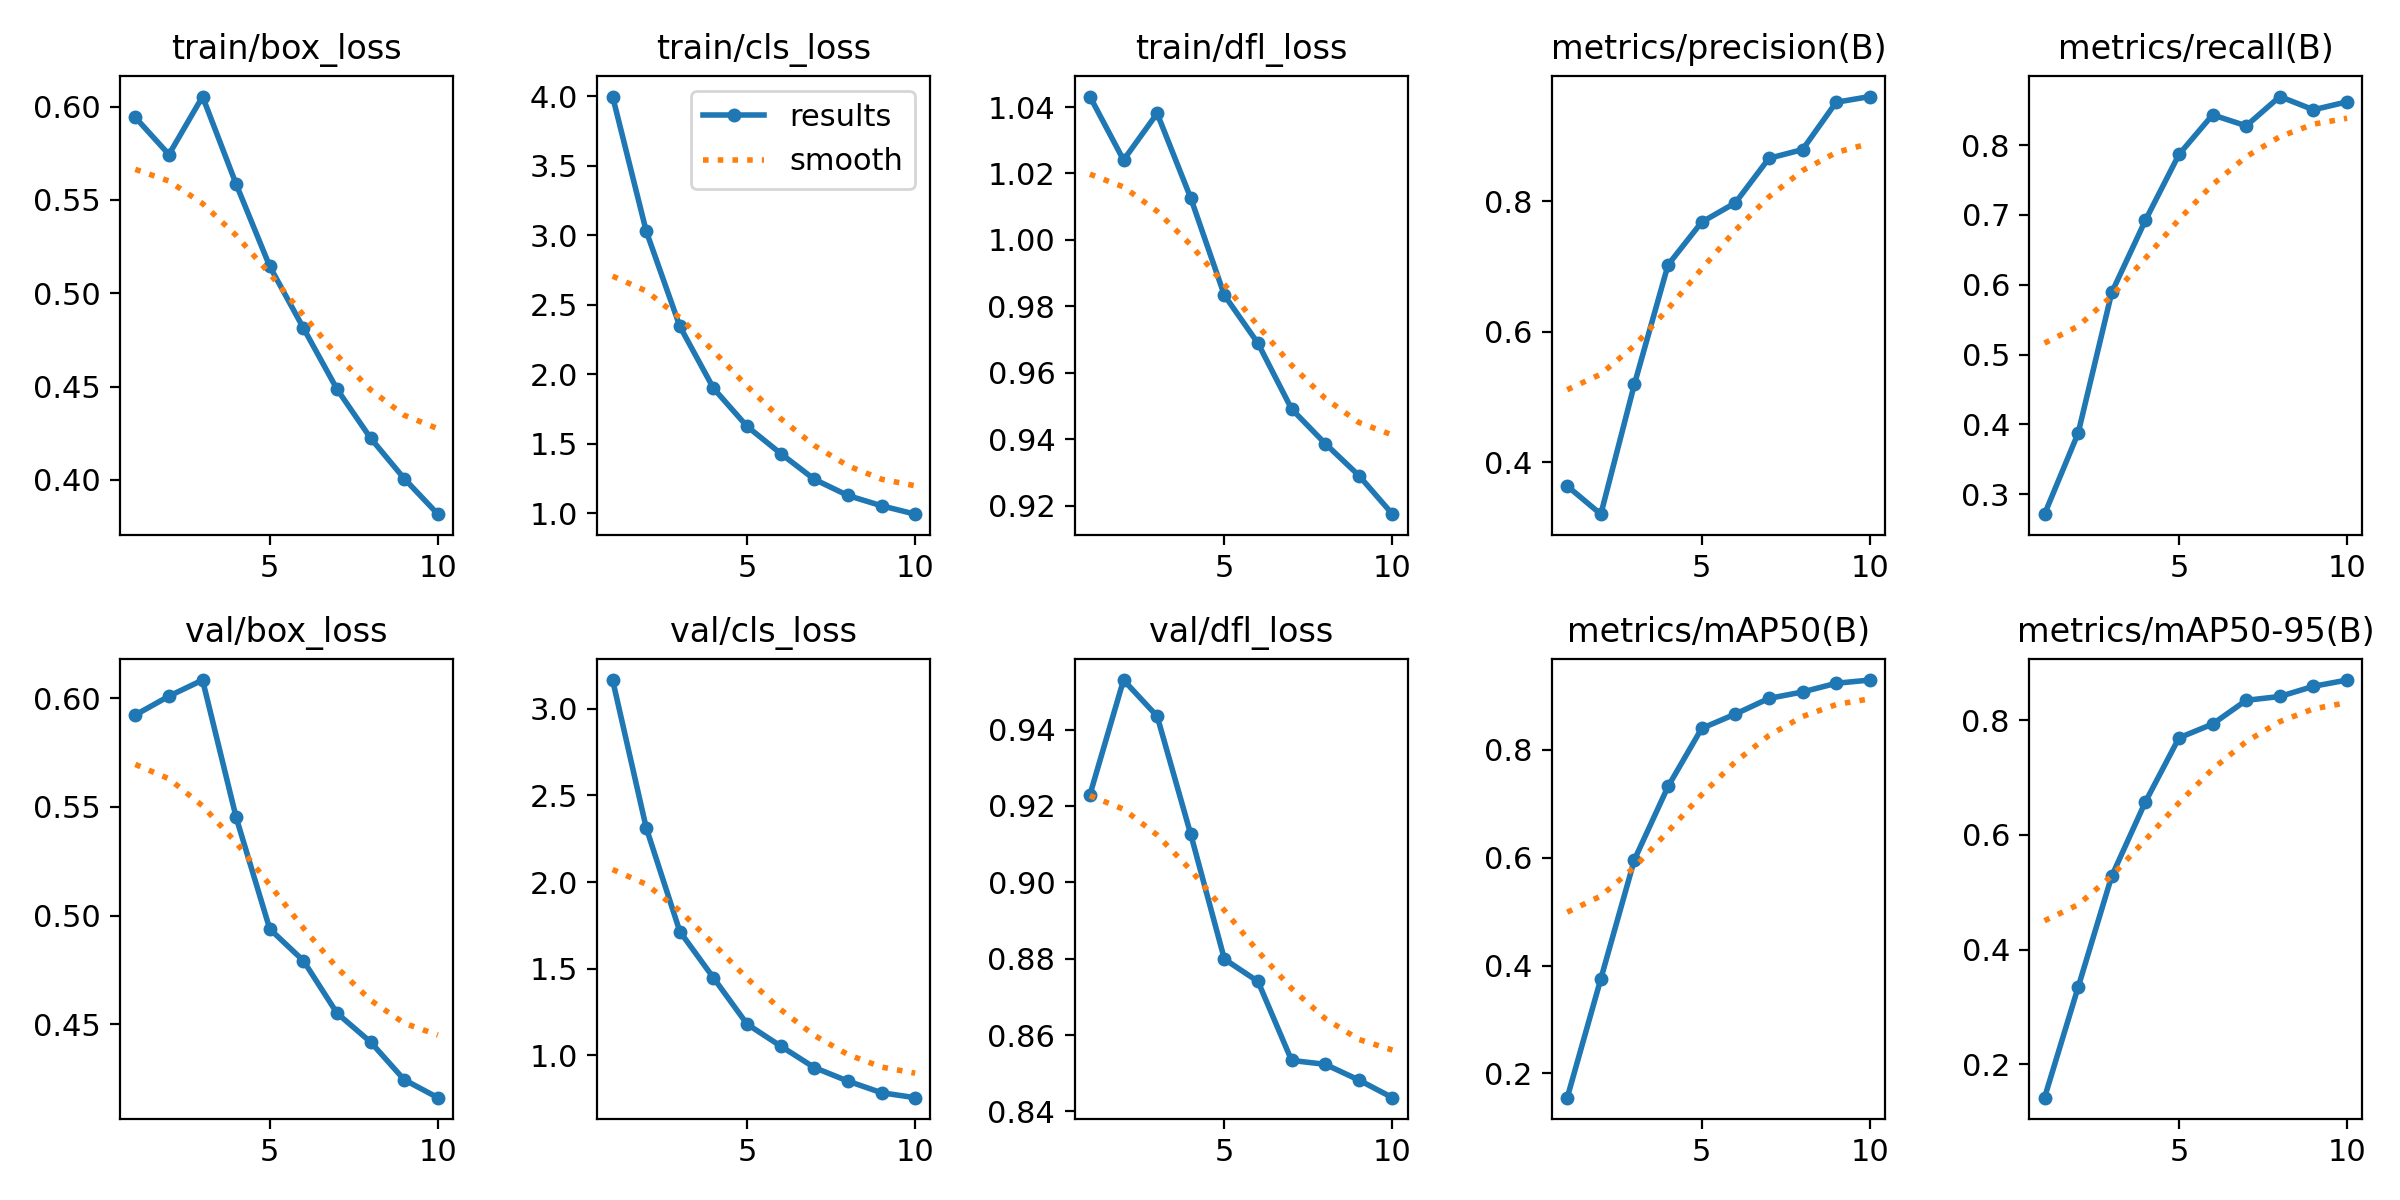

In [14]:
from IPython.display import Image

# Show the training curves (loss, precision, recall, mAP)
Image(filename='/content/runs/detect/train2/results.png', width=800)


The performance of the model:

1.   **train/box_loss:**
The bounding box regression loss on the training set is decreasing gradually during the training which means the model learns to localize the hand signs more accurately.
2.   **train/cls_loss:**
The classification loss during the training is getting lower which means the model classifies the hand signs better over the training.

3.   **train/dfl_loss:**
Distribution focal loss  gets lower overtime and refines the bounding box predictions

4. **metrics/precision(B):**
The precision is almost 0.9 which means almost 90% of the predicted hand signs are correct.

5.   **metrics/recall(B):**
The recall is  more than 0.85 which means the model detects around 85% of the true signs.

6. **val/box_loss:**
The bounding box regression loss on the validation set is decreasing steadily which means the model learns to localize the hand signs more accurately.


7. **val/cls_loss:**
The classification loss during the validation is also decreasing which means the model classifies the hand signs better overtime during the validation.


8. **val/dfl_loss:**
Distribution focal loss  during validation also gets lower overtime and better refines the bounding box predictions

9.  **metrics/mAP50(B):**
Mean Average Precision at IoU (intersection over Union) = 0.5. This model mAP is around 0.9 which means that it almost always detect the hands and signs correctly.

10. **metrics/mAP50-95(B):**

Mean Average Precision averaged over IoU thresholds from  0.5 to 0.95. The model scores averaged around 0.85 which means the bounding boxes accurately localizing the hands and the signs.

From these results, the model is generalizing well and not overfitting.


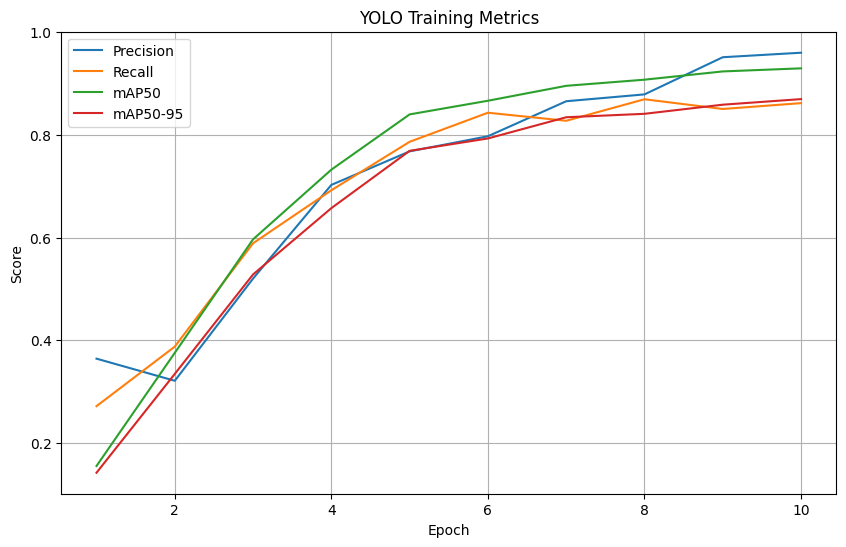

In [23]:
import matplotlib.pyplot as plt

# Plot precision, recall, mAP50, and mAP50-95
plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('YOLO Training Metrics')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
#run on localhost

›model = YOLO("/content/runs/detect/train2/weights/best.pt")

# test on webcam
results = model.predict(source=0, show=True)


SyntaxError: invalid character '›' (U+203A) (ipython-input-901470041.py, line 3)